#### importing needed libraries

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import helper
import re 
from datetime import datetime
from sklearn.preprocessing import StandardScaler

#### loading data

In [40]:
df = pd.read_csv("dataset/train.csv")

df.head()

,ID,Brand,VehicleModel,ManufacturingYear,Type,rating,color,Duty,fuel,CylinderCount,type of gear,capacity,Odometer,#airbags,price
0,2624,NaN,I have the fastest model ever.. yes you got it...,2017,WOOW Sedan,0.0,NaN,I had to pay a substantial $1249 levy on my ne...,Gas,4.0,R,2.5,75492 KM,1008,21012
1,14392,I love TOYOTA,NaN,NaN,Minivan3,5.0,Metallic,-,Gas,4.0 cyl,R,2.4,220000 KM,-96,11917
2,9822,hyundai,H1,2009,MINIVAN,0.0,Metallic,1185$,Dies,4.0,R,2.5,TOTAL 50653 km,4 count,22433
3,17123,opel,Corsa,NaN,Hatchback,5.0,Jet Black,-,NaN,4.0,auto,0,230000 KM,0,5645
4,11133,subaru,I own Outback.,2007,Hatchback,4.0,Sapphire Blue,-,Gas,4.0,NaN,2.5,131000 KM,4,10976


#### Exploring the data

In [41]:
df.shape

(7000, 15)

In [42]:
for col in df.columns:
    print(f" {df[col].value_counts(dropna=False)} {df[col].dtype} \n ")

 ID
2624     1
12791    1
1287     1
8570     1
7855     1
        ..
7105     1
3546     1
17713    1
2135     1
17637    1
Name: count, Length: 7000, dtype: int64 int64 
 
 Brand
NaN                   706
toyota                497
hyundai               486
TOYOTA                370
HYUNDAI               364
                     ... 
SCION                   1
ROLLS-ROYCE             1
DAEWOO is the best      1
I love CITROEN          1
Jaguar                  1
Name: count, Length: 186, dtype: int64 object 
 
 VehicleModel
NaN                      697
Prius                    113
Sonata                   104
Elantra                   96
FIT                       96
                        ... 
Mazda 6 Grand Touring      1
I own Clio.                1
500 Abarth                 1
I own Quest.               1
I own X-type.              1
Name: count, Length: 1481, dtype: int64 object 
 
 ManufacturingYear
NaN      695
2012     429
2014     425
2013     398
2011     349
        ... 
2008

there's a lot of problems in the data :
- datatypes issuse (numerical cols)
- same values are written in diffrent ways

In [43]:
df.isnull().sum()

ID                      0
Brand                 706
VehicleModel          697
ManufacturingYear     695
Type                  685
rating                690
color                2124
Duty                    0
fuel                  696
CylinderCount           0
type of gear          692
capacity                0
Odometer                0
#airbags                0
price                   0
dtype: int64

- missing data as well

#### Data Cleaning

##### removing useless columns

In [44]:
df.drop(columns=["ID"], inplace=True)

##### Brand Column :

In [45]:
# Replacing the NAN values with "unknown"
df["Brand"] = df["Brand"].fillna("unknown")

# Lowercasing
df["Brand"] = df["Brand"].apply(lambda x: "".join(x.lower()))

In [46]:
# Extracting the brand name
def extract_text(input, correct_list):
    for word in correct_list:
        if re.search(r'\b'+re.escape(word)+r'\b',input, re.IGNORECASE):
            return word
    return "unknown"

df["Brand"] = df["Brand"].apply(lambda x : extract_text(x,helper.brands))
df["Brand"].unique()


array(['unknown', 'toyota', 'hyundai', 'opel', 'subaru', 'volkswagen',
       'ford', 'bmw', 'jaguar', 'honda', 'mercedes-benz', 'nissan',
       'lexus', 'ssangyong', 'kia', 'daewoo', 'audi', 'chevrolet', 'jeep',
       'porsche', 'mazda', 'mitsubishi', 'gmc', 'skoda', 'suzuki', 'fiat',
       'peugeot', 'dodge', 'mini', 'vaz', 'gaz', 'cadillac', 'uaz',
       'seat', 'rover', 'chrysler', 'land rover', 'infiniti',
       'alfa romeo', 'renault', 'greatwall', 'buick', 'volvo', 'lincoln',
       'scion', 'rolls-royce', 'citroen', 'pontiac', 'acura', 'daihatsu',
       'moskvich', 'mercury'], dtype=object)

##### VehicleModel Column :

In [47]:
#same as the brand column I'll replace the NAN values with "unknown" and lowercase it

df["VehicleModel"] = df["VehicleModel"].fillna("unknown")

# Lowercasing
df["VehicleModel"] = df["VehicleModel"].apply(lambda x: "".join(x.lower()))

In [48]:
# I'll call my method extract_text() to extract the models name

df["VehicleModel"] = df["VehicleModel"].apply(lambda x: extract_text(x, helper.models))

df["VehicleModel"].unique()

array(['6', 'unknown', 'h1', 'corsa', 'outback', 'is', 'e', 's', 'x6',
       'xj', 'a', 'elantra', 'presage rider', 'prius', 'transit', 'astra',
       'focus', 'insight', 'rx', 'camry', '330', 'corolla', 'forester',
       'pathfinder', 'highlander', 'optima', 'fiesta', 'rs7', 'sonata',
       'vectra', '328', 'x5', 'gla', 'tucson', 'zafira', '616', 'c',
       '528', 'captiva', 'santa fe', 'ml 350', 'orlando', 'rav 4', 'gx',
       'terra', 'jetta', 'aveo', 'gle', '520', 'land cruiser', 'yukon',
       'cx-9', 'outlander', 'octavia', 'civic', 'ct', 'picanto', 'chr',
       'compass', 'sprinter', 'veracruz', 'altima', 'kicks sr', 'cruze',
       'sharan', 'es 300', 'equinox', 'fusion', '500', 'polo', 'touareg',
       'q7', 'juke', 'venza', 'ist', 'a4', 'lacetti', 'gl', 'cherokee',
       'cooper', 'tiguan', 'countryman', 'mustang', 'cr-v', '206',
       'genesis', 'clk 230', 'clk 320', 'vitz', 'ats', '323', 'cls', 'z4',
       'spark', 'malibu', 'serena', 'pajero', 'skyline 4wd', 'v

#### ManufacturingYear Column:

In [49]:
# Extracting the year
def extract_year(text):
    text = str(text)
    match = re.search(r'(19|20)\d{2}', text)
    if match:
        return match.group(0) 

    match = re.search(r'(\d{1,2})(?=\s*years? old)', text) 
    if match:
        current_year = datetime.now().year
        match = current_year - int(match.group(1))
        return match
    return 0


df["ManufacturingYear"] = df["ManufacturingYear"].apply(extract_year)
df["ManufacturingYear"].unique()

array(['2017', 0, '2009', '2007', '1999', '2012', '2011', '2014', '2015',
       '2006', '2013', '2010', '2003', '2016', '1998', '2018', '2008',
       '2020', '2005', '2004', '1910', '1914', 2011, '2001', '1997',
       '1917', 2010, '1916', '1912', '2002', '2019', 2015, '1907', '2000',
       '1996', 2013, 2012, 2014, 2018, '1913', '1900', '1902', 2017,
       '1995', 2019, '1915', 2016, '1911', 2004, '2098', 1999, '1918',
       1997, '1908', 2001, '1992', '2099', 2005, '1985', '1909', 2002,
       '1905', 1992, '1983', '1904', '1993', 2008, '1994', '1988', 2000,
       '1903', 2006, 2009, '1982', 1996, 2007, 2020, '1987', '1991', 2003,
       '1990', '2097', 1994, '1939', '1919', '2096', 2021, 1998, '1901',
       1954, '1986', 1985, '1920', '2089', '1984', '1906', '2093', '1978'],
      dtype=object)

#### Type column :

In [50]:
df["Type"].unique()

array(['WOOW Sedan', 'Minivan3', 'MINIVAN', 'Hatchback', 'sedan', 'SEDAN',
       'Pickup3', 'jeep', 'Minivan', 'HATCHBACK', 'minivan', 'hatchback',
       'JEEP', 'microbus', nan, 'Jeep1', 'Sedan0', 'Coupe', 'Sedan3',
       'Hatchback3', 'Sedan', 'Jeep0', 'WOOW Hatchback', 'WOOW Jeep',
       'Hatchback1', 'WOOW Coupe', 'UNIVERSAL', 'Hatchback2', 'Jeep2',
       'Hatchback4', 'Sedan4', 'Sedan1', 'Jeep', 'WOOW Minivan', 'Jeep4',
       'Hatchback0', 'Goods Wagon', 'universal', 'WOOW Goods wagon',
       'MICROBUS', 'Minivan0', 'Coupe1', 'goods wagon', 'pickup', 'Jeep3',
       'Sedan2', 'coupe', 'Pickup1', 'COUPE', 'CABRIOLET', 'Universal0',
       'Microbus', 'WOOW Universal', 'Goods wagon1', 'WOOW Microbus',
       'Minivan2', 'GOODS WAGON', 'cabriolet', 'Goods wagon0', 'Coupe4',
       'Universal', 'Goods wagon2', 'Microbus4', 'Coupe3', 'Goods wagon4',
       'Limousine', 'PICKUP', 'Microbus0', 'Coupe0', 'Goods wagon3',
       'Universal3', 'Minivan1', 'Microbus3', 'Microbus1', 'Un

In [51]:
df["Type"] = df["Type"].fillna("unknown")
df["Type"] = df["Type"].apply(lambda x: "".join(x.lower()))

df["Type"] = df["Type"].apply(lambda x: re.sub(r'^woow\s|\d+', '', x))
df["Type"].unique()

array(['sedan', 'minivan', 'hatchback', 'pickup', 'jeep', 'microbus',
       'unknown', 'coupe', 'universal', 'goods wagon', 'cabriolet',
       'limousine'], dtype=object)

#### rating column :

In [52]:
df["rating"] = df["rating"].fillna(0)

#### Color Column : 

In [53]:
df["color"] = df["color"].fillna("unkown")
df["color"].unique()

array(['unkown', 'Metallic', 'Jet Black', 'Sapphire Blue', 'Pearl White',
       'Charcoal', 'Gold', 'Crimson', 'Tangerine', 'Sand',
       'Emerald Green', 'Lemon Yellow', 'Chocolate', 'Sky Blue',
       'Ruby Red', 'Rose Pink', 'Royal Purple'], dtype=object)

#### Duty Column :

In [54]:
df["Duty"] = df["Duty"].apply(lambda x: ''.join(re.findall(r'\d', x)))
df["Duty"].fillna(0)
df["Duty"].dtype
df['Duty'] = pd.to_numeric(df['Duty'], errors='coerce')

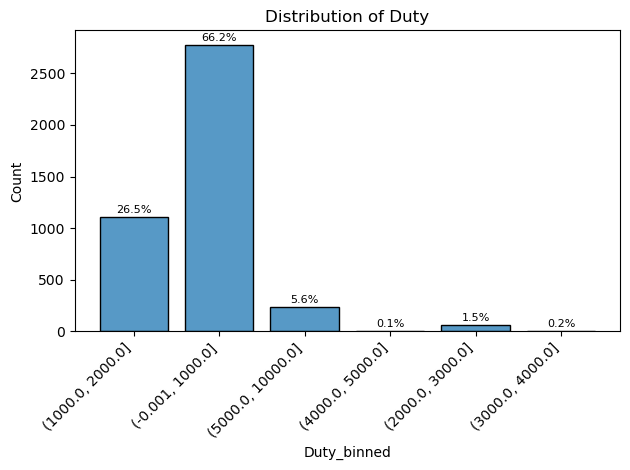

In [55]:
# Binning cause there're too many unique values

custom_bins = [0, 1000, 2000, 3000, 4000, 5000, 10000]
df['Duty_binned'] = pd.cut(df['Duty'], bins=custom_bins, include_lowest=True)
df = df.dropna(subset=['Duty_binned'])

df['Duty_binned'] = df['Duty_binned'].astype(str)

ax = sns.histplot(data=df, x='Duty_binned', shrink=0.8)
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
    
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Duty')
plt.tight_layout()

plt.show()

- most(66%) duties are in range (0,1000)

#### fuel Column :

In [56]:
df["fuel"].unique()

array(['Gas', 'Dies', 'Electric Hybrid', nan, 'other', 'hyb',
       'Natural Gas'], dtype=object)

In [57]:
df["fuel"] = df["fuel"].fillna("other")
df["fuel"] = df["fuel"].replace("Natural Gas", "Gas")
df["fuel"] = df["fuel"].replace("hyb", "Electric Hybrid")
df["fuel"].unique()

array(['Gas', 'Dies', 'Electric Hybrid', 'other'], dtype=object)

#### CylinderCount Column :

In [58]:
df["CylinderCount"].unique()

array(['4.0', '4.0 cyl', '8.0', '6.0 cyl', '6.0', '14.0', '0', '18.0',
       '16.0', '8.0 cyl', '3.0', '5.0', '3.0 cyl', '15.0', '10.0',
       '10.0 cyl', '1.0', '5.0 cyl', '12.0 cyl', '13.0', '2.0',
       '16.0 cyl', '12.0'], dtype=object)

In [59]:
df["CylinderCount_updated"] = df["CylinderCount"].apply(lambda x: ''.join(re.findall(r'^\d+', x)))
df["CylinderCount_updated"].fillna(0)
df["CylinderCount"] = pd.to_numeric(df["CylinderCount_updated"])
df["CylinderCount"].unique()

array([ 4,  8,  6, 14,  0, 18, 16,  3,  5, 15, 10,  1, 12, 13,  2],
      dtype=int64)

#### type of gear Column :

In [60]:
df["type of gear"].unique()

array(['R', nan, 'auto', 'others', 'AUTO', 'gear', 'manual', 'MANUAL'],
      dtype=object)

In [61]:
df["type of gear"] = df["type of gear"].fillna("others")
df["type of gear"] = df["type of gear"].apply(lambda x: "".join(x.lower()))
df["type of gear"] = df["type of gear"].replace('r', 'reverse')
df["type of gear"] = df["type of gear"].replace('gear', 'others')
df["type of gear"].unique()

array(['reverse', 'others', 'auto', 'manual'], dtype=object)

#### Capacity Column :

In [62]:
df["capacity"].unique()

array(['2.5', '2', '5', '3', '0', '3.5', '1.6', '1.5', '1.3', '1.8',
       '2.4', '2.7', '2.5 Turbo', '3.3', '1.7', '4', '1.2', '2.3',
       '1.6 Turbo', '4.7', '2.0 Turbo', '1.4', '5.5', '6.2', '4.6', '3.7',
       '1', '3.6', '4.4', '1.8 Turbo', '2.2 Turbo', '2.2', '1.5 Turbo',
       '1.4 Turbo', '5.7', '3.0 Turbo', '4.8', '2.8 Turbo', '0.4',
       '2.4 Turbo', '0.2', '1.7 Turbo', '3.8', '3.2', '0.1', '6.7', '4.5',
       '3.5 Turbo', '2.1', '0.7', '5.3', '4.4 Turbo', '0.8 Turbo',
       '1.3 Turbo', '4.7 Turbo', '1.9 Turbo', '5.6', '1.9', '5.2', '0.8',
       '2.7 Turbo', '4.3'], dtype=object)

In [63]:
df["capacity_updated"] = df["capacity"].apply(lambda x: ''.join(re.findall(r'\d\.\d', x)))
#df["capacity_updated"].unique()
df["capacity"] = pd.to_numeric(df["capacity_updated"])
df["capacity"] = df["capacity"].fillna(0)
df.drop(columns=["capacity_updated"], inplace=True)
df["capacity"].unique()

array([2.5, 0. , 3.5, 1.6, 1.5, 1.3, 1.8, 2.4, 2.7, 3.3, 1.7, 1.2, 2.3,
       4.7, 2. , 1.4, 5.5, 6.2, 4.6, 3.7, 3.6, 4.4, 2.2, 5.7, 3. , 4.8,
       2.8, 0.4, 0.2, 3.8, 3.2, 0.1, 6.7, 4.5, 2.1, 0.7, 5.3, 0.8, 1.9,
       5.6, 5.2, 4.3])

#### Odometer Column :

In [64]:
print(df["Odometer"].isna().sum())
df["Odometer"]

0


0             75492 KM
2       TOTAL 50653 km
5             66000 KM
7         150000  kilo
10            54429 km
             ...      
6995      156802  kilo
6996         110715 km
6997         314373 KM
6998          80000 km
6999            131627
Name: Odometer, Length: 4196, dtype: object

In [65]:
df["odometer_updated"] = df["Odometer"].apply(lambda x: ''.join(re.findall(r'\d', x)))
df["odometer_updated"].unique()
df["Odometer"] = pd.to_numeric(df["odometer_updated"])
df.drop(columns=["odometer_updated"], inplace=True)

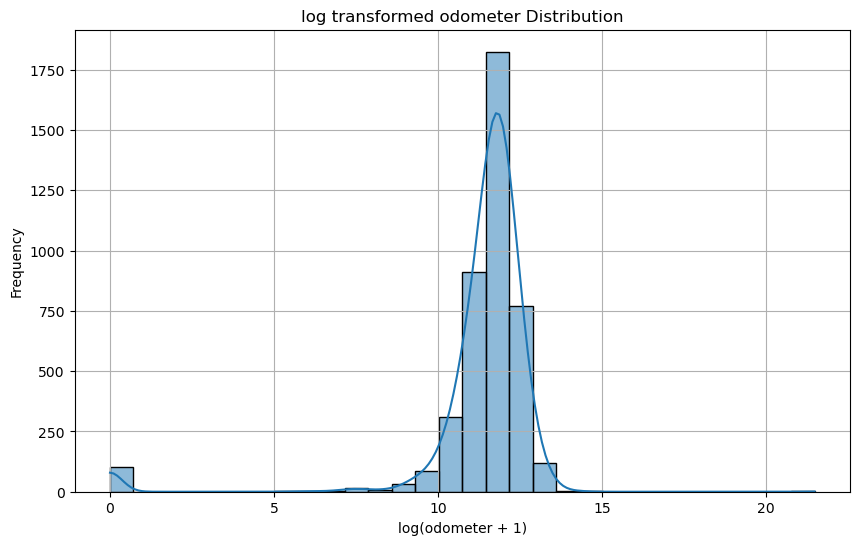

In [66]:
# Log-transform for better scaling 
df["log_odometer"] = np.log1p(df["Odometer"])

plt.figure(figsize=(10, 6))
sns.histplot(df["log_odometer"] , bins=30, kde=True)
plt.title('log transformed odometer Distribution')
plt.xlabel('log(odometer + 1)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### #airbags Column :

In [67]:
df["#airbags"].unique()

array(['1008', '4 count', '12', '8', '12,', '106', '12<', '4', '6 count',
       'ONLY 4 AIRBAG', '1012', '12 bags', '4 bags', '8 count',
       'ONLY 0 AIRBAG', '12/', '10', '12)', '-100', 'ONLY 12 AIRBAG',
       '12  ', '108', '4<', '12|', 'ONLY 8 AIRBAG', '0', '12`', '4]',
       '8$', '2 count', '-88', '10 count', '4  ', '12>', '6  ', '2', '11',
       '4&', '0 count', '4#', '104', '8 bags', '12~', '6', '4!',
       '12 count', '6?', '-92', '112', '100', '-96', '1004', '9', '4$',
       '6 bags', '4,', '-90', 'ONLY 2 AIRBAG', '0~', "8'", '2 bags', '4[',
       '-94', '10 bags', '0  ', '8&', '0 bags', '12#', "0'", '2*', '4(',
       '8@', '-98', '4_', "4'", '10  ', '12&', '7', '12}', '6"', '6:',
       '4;', '12$', '8(', '4`', '7  ', '12+', '6/', 'ONLY 6 AIRBAG', '4|',
       '12@', '4:', 'ONLY 10 AIRBAG', '0^', '1000', '4+', '12_', '0|',
       '12.', '14', '0)', '12]', 'ONLY 11 AIRBAG', "12'", '0>', '12%',
       '116', '4=', '0,', '12(', '8:', '14  ', '0_', '4-', '8  ', '0%',
  

In [ ]:
df["#airbags_updated"] = df["#airbags"].apply(lambda x: ''.join(re.findall(r'\d', x)))
df["#airbags"] = pd.to_numeric(df["#airbags_updated"])
df["#airbags"] = df["#airbags"].fillna(0)


TypeError: expected string or bytes-like object, got 'int'

In [74]:
df["#airbags"].value_counts()

#airbags
12    1388
4     1303
0      907
8      225
10     140
6      119
2       62
7       13
11      10
16      10
9        7
5        6
14       3
1        1
3        1
15       1
Name: count, dtype: int64

- the data values are unreasonable

In [75]:
df["#airbags"] = df["#airbags"].apply(lambda x: x if x<20 else 0)
df["#airbags"].value_counts()

#airbags
12    1388
4     1303
0      907
8      225
10     140
6      119
2       62
7       13
11      10
16      10
9        7
5        6
14       3
1        1
3        1
15       1
Name: count, dtype: int64

#### Price Column :

In [77]:
df["price"].isna().sum()

0

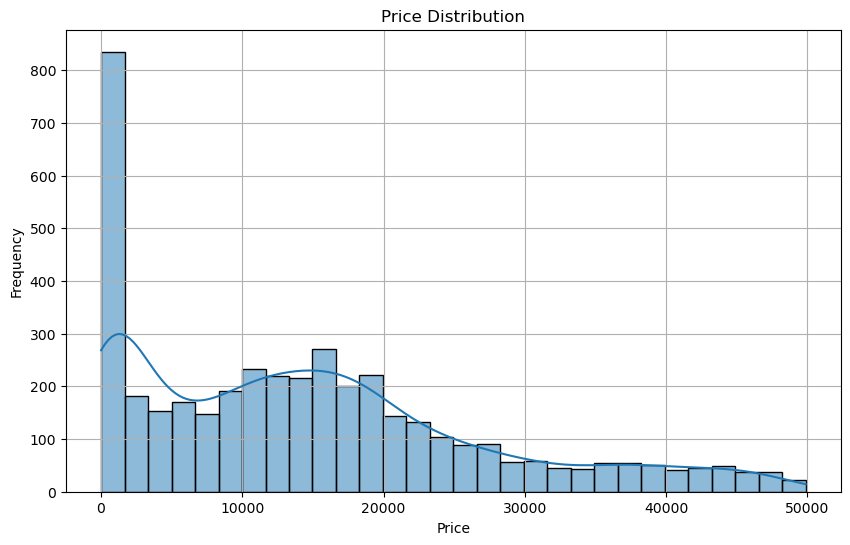

In [78]:
plt.figure(figsize=(10, 6))
sns.histplot(df["price"] , bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

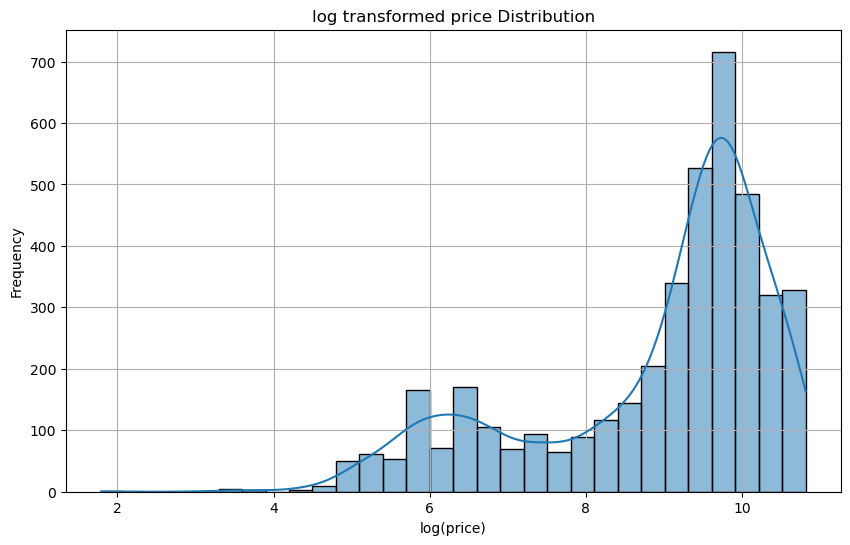

In [81]:
# Trying out log trnsformation on it  
df["log_price"] = np.log(df["price"])

plt.figure(figsize=(10, 6))
sns.histplot(df["log_price"] , bins=30, kde=True)
plt.title('log transformed price Distribution')
plt.xlabel('log(price)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()